In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import FiniteDifference as fd

from importlib import reload

In [2]:
%matplotlib notebook
dpi = 180
mpl.rcParams['figure.dpi'] = dpi

In [33]:
reload(fd)

<module 'FiniteDifference' from 'C:\\Users\\lucas\\Documents\\Grad Work\\Summer Research 2020\\FiniteDifference.py'>

# Testing the finite difference method

### Here we'll symbolically and then numerically differentiate some functions $f: \mathbb{R}^2 \to \mathbb{R}$ in order to make sure the finite difference method is working properly.

### $f = \sin(y)\cos(x) \implies \partial^2 f/\partial x^2 = -\sin(y)\cos(x)$

In [29]:
def f(x, y):
    return np.sin(y)*np.cos(x)

def dx2f(x, y):
    return -np.sin(y)*np.cos(x)

<IPython.core.display.Javascript object>


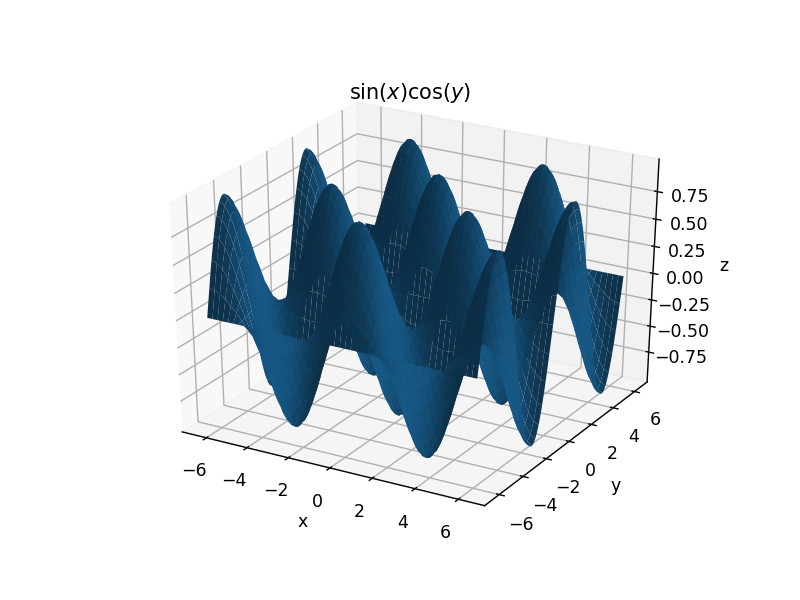

Text(0.5, 0.92, '$\\sin(x)\\cos(y)$')

In [19]:
fig = plt.figure()
ax = fig.gca(projection='3d')

x = np.linspace(-2*np.pi, 2*np.pi, num=1000)
y = np.linspace(-2*np.pi, 2*np.pi, num=1000)
X, Y = np.meshgrid(x, y, indexing='ij')
Z = f(X, Y)

surf = ax.plot_surface(X, Y, Z)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

ax.set_title(r'$\sin(x)\cos(y)$')

<IPython.core.display.Javascript object>


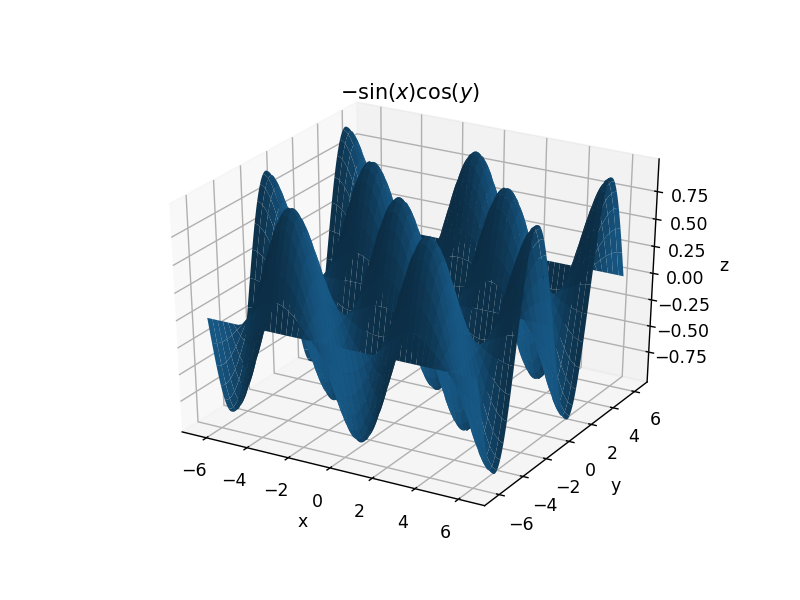

Text(0.5, 0.92, '$-\\sin(x)\\cos(y)$')

In [20]:
fig = plt.figure()
ax = fig.gca(projection='3d')

x = np.linspace(-2*np.pi, 2*np.pi, num=1000)
y = np.linspace(-2*np.pi, 2*np.pi, num=1000)
X, Y = np.meshgrid(x, y, indexing='ij')
Z = dx2f(X, Y)

surf = ax.plot_surface(X, Y, Z)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

ax.set_title(r'$-\sin(x)\cos(y)$')

<IPython.core.display.Javascript object>


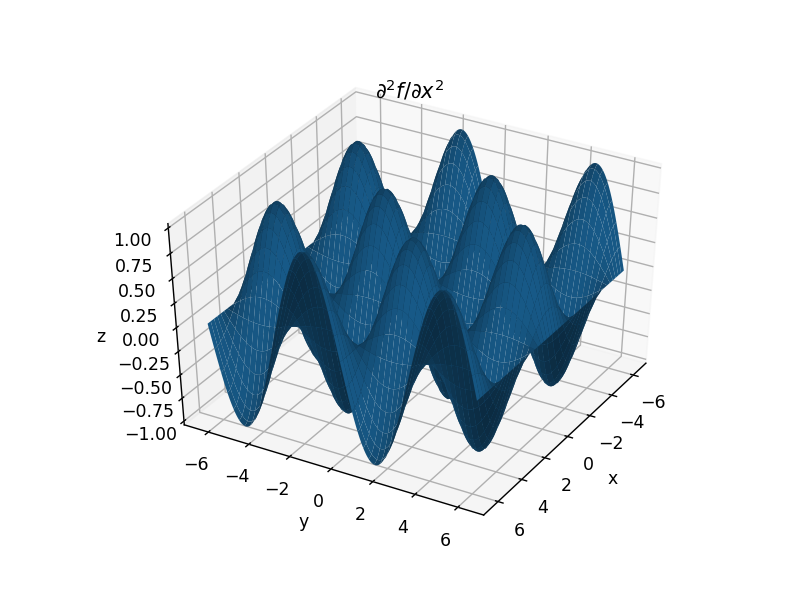

Text(0.5, 0.92, '$\\partial^2 f/\\partial x^2$')

In [25]:
fig = plt.figure()
ax = fig.gca(projection='3d')

dist = 2*np.pi
n = 1000

dx = 2*dist/(n - 1)

x = np.linspace(-dist, dist, num=n)
y = np.linspace(-dist, dist, num=n)
X, Y = np.meshgrid(x, y, indexing='ij')
Z = fd.dx2( f(X, Y), dx )

surf = ax.plot_surface(X, Y, Z)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

ax.set_title(r'$\partial^2 f/\partial x^2$')

<IPython.core.display.Javascript object>


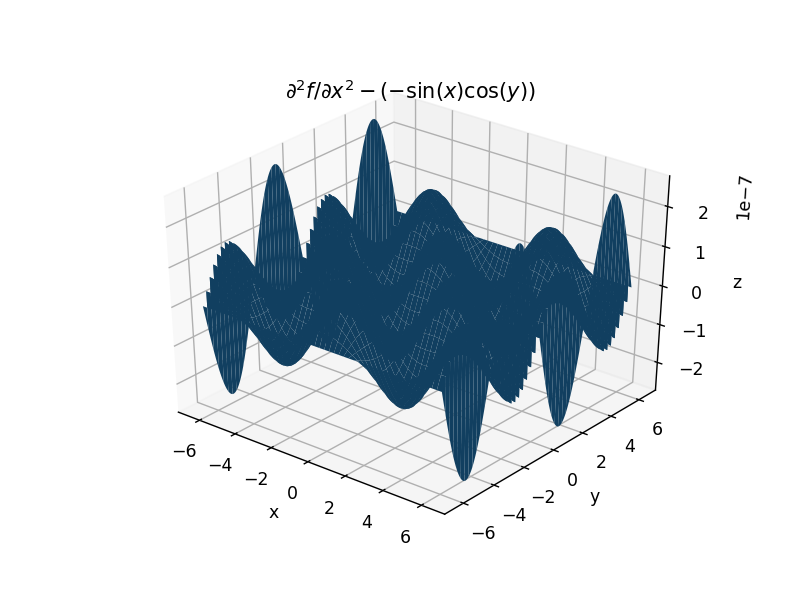

Text(0.5, 0.92, '$\\partial^2 f/\\partial x^2 - (-\\sin(x)\\cos(y))$')

In [26]:
fig = plt.figure()
ax = fig.gca(projection='3d')

dist = 2*np.pi
n = 10000
dx = 2*dist/(n - 1)

x = np.linspace(-dist, dist, num=n)
y = np.linspace(-dist, dist, num=n)
X, Y = np.meshgrid(x, y, indexing='ij')
Z = fd.dx2( f(X, Y), dx ) - dx2f(X, Y)

surf = ax.plot_surface(X, Y, Z)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

ax.set_title(r'$\partial^2 f/\partial x^2 - (-\sin(x)\cos(y))$')

### Now we gotta test the y-direction finite differencer

### $f = \sin(x)\cos(y) \implies \partial^2 f/\partial y^2 = -\sin(x)\cos(y)$

In [30]:
def g(x, y):
    return np.sin(x)*np.cos(y)

def dy2g(x, y):
    return -np.sin(x)*np.cos(y)

<IPython.core.display.Javascript object>


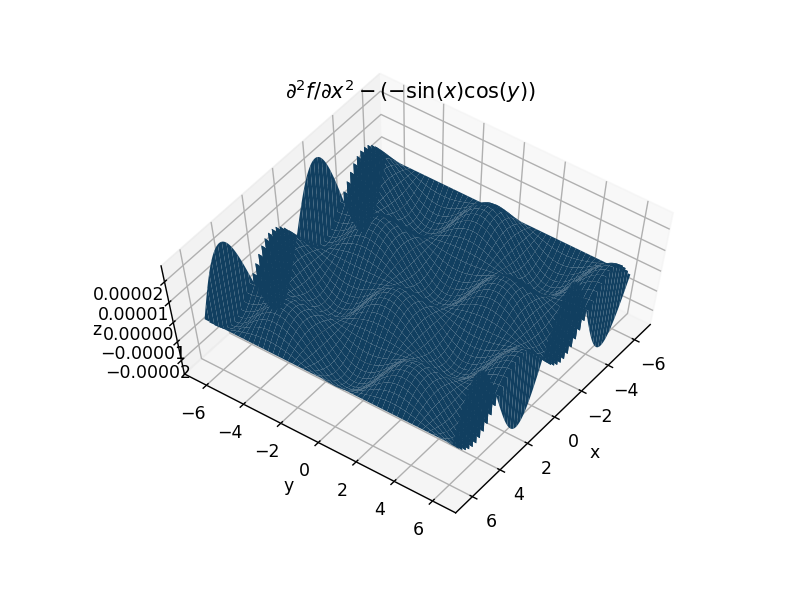

Text(0.5, 0.92, '$\\partial^2 f/\\partial x^2 - (-\\sin(x)\\cos(y))$')

In [34]:
fig = plt.figure()
ax = fig.gca(projection='3d')

dist = 2*np.pi
n = 1000
dx = 2*dist/(n - 1)

x = np.linspace(-dist, dist, num=n)
y = np.linspace(-dist, dist, num=n)
X, Y = np.meshgrid(x, y, indexing='ij')
Z = fd.dy2( g(X, Y), dx ) - dy2g(X, Y)

surf = ax.plot_surface(X, Y, Z)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

ax.set_title(r'$\partial^2 f/\partial x^2 - (-\sin(x)\cos(y))$')